In [55]:
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data = load_boston()

In [57]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

```
Attribute Information (in order):
        - CRIM     per capita crime rate by town,
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft,
        - INDUS    proportion of non-retail business acres per town,
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise),
        - NOX      nitric oxides concentration (parts per 10 million),
        - RM       average number of rooms per dwelling,
        - AGE      proportion of owner-occupied units built prior to 1940,
        - DIS      weighted distances to five Boston employment centres,
        - RAD      index of accessibility to radial highways,
        - TAX      full-value property-tax rate per $10,000',
        - PTRATIO  pupil-teacher ratio by town,
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town,
        - LSTAT    % lower status of the population,
        - MEDV     Median value of owner-occupied homes in $1000's
```

In [58]:
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df['MEDV'] = data['target']

In [59]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Requirements:
- Using linear regression to model the housing price in Boston (target variable: **MEDV**)
- Evaluation on training and testing setsp
/- Plot model or something like accuracy, error...

In [60]:
df.shape

(506, 14)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [62]:
%config Completer.use_jedi = False

In [63]:
df.duplicated().sum()

0

In [64]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


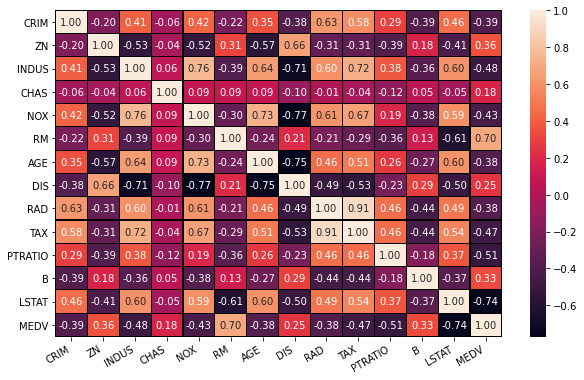

In [65]:
plt.figure(figsize=(10, 6))
ax = sns.heatmap(df.corr(), fmt='.2f', annot=True, linewidths=0.1, linecolor='black');
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha='right');

### Requirements:
- Using linear regression to model the housing price in Boston (target variable: **MEDV**)
- Evaluation on training and testing sets
- Plot model or something like accuracy, error...

[Text(0.5, 0, 'B'), Text(0, 0.5, 'MEDV'), Text(0.5, 1.0, 'MEDV vs B')]

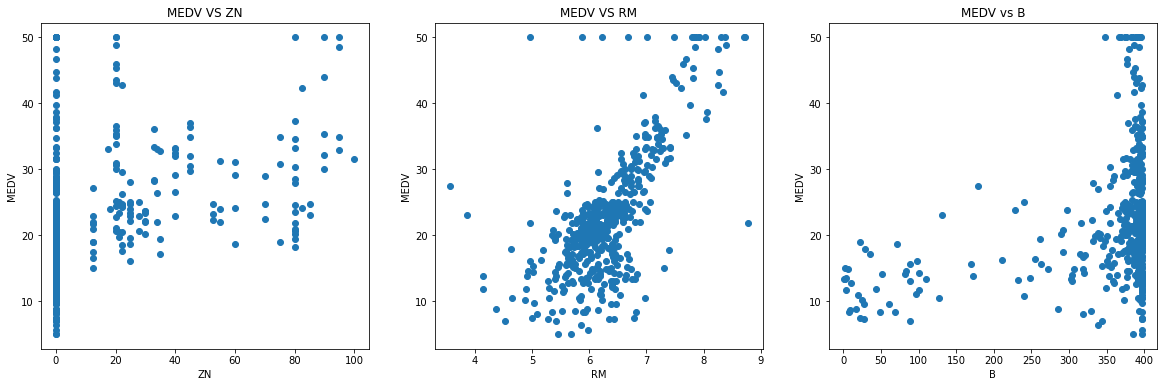

In [66]:
fig, ax= plt.subplots(1,3, figsize=(20,6))
ax[0].scatter(df['ZN'], df['MEDV'])
ax[0].set(xlabel='ZN', ylabel='MEDV', title='MEDV VS ZN')
ax[1].scatter(df['RM'], df['MEDV'])
ax[1].set(xlabel='RM', ylabel='MEDV', title='MEDV VS RM')
ax[2].scatter(df['B'], df['MEDV'])
ax[2].set(xlabel='B', ylabel='MEDV', title='MEDV vs B')

In [67]:
cols=['ZN','RM','B','MEDV']
sub_col=['RM','MEDV']
train_df=df[cols]

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [69]:
model=LinearRegression()
model.fit(train_df[['RM']],train_df.MEDV)

LinearRegression()

In [70]:
model

LinearRegression()

In [71]:
model.coef_

array([9.10210898])

In [72]:
model.intercept_

-34.67062077643857

In [73]:
y_pre=model.predict(train_df[['RM']])

In [74]:
pd.DataFrame({'actual':train_df.MEDV, 'predict':y_pre})

,actual,predict
0,24.0,25.175746
1,21.6,23.774021
2,34.7,30.728032
3,33.4,29.025938
4,36.2,30.382152
...,...,...
501,22.4,25.339584
502,20.6,21.034286
503,23.9,28.825691
504,22.0,27.169108


In [75]:
mean_squared_error(train_df.MEDV, y_pre)

43.60055177116956

In [76]:
mean_absolute_error(train_df.MEDV, y_pre)

4.4477729015322325

In [77]:
r2_score(train_df.MEDV, y_pre)*100

48.35254559913342

In [78]:
###test

In [80]:
cols=['ZN','RM','B','MEDV']
sub_col=['RM','MEDV']
train_df=df[cols]

In [81]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [82]:
model=LinearRegression()
model.fit(train_df[['ZN','RM','B']],train_df.MEDV)

LinearRegression()

In [83]:
model

LinearRegression()

In [84]:
model.coef_

array([0.04898852, 8.20692691, 0.02330745])

In [85]:
model.intercept_

-37.914578717907574

In [86]:
y_pre=model.predict(train_df[['ZN','RM','B']])

In [87]:
pd.DataFrame({'actual':train_df.MEDV, 'predict':y_pre})

,actual,predict
0,24.0,26.178486
1,21.6,24.032826
2,34.7,30.208057
3,33.4,28.715315
4,36.2,29.991055
...,...,...
501,22.4,25.329978
502,20.6,21.562541
503,23.9,28.587670
504,22.0,27.013599


In [88]:
mean_squared_error(train_df.MEDV, y_pre)

37.322031640813584

In [89]:
mean_absolute_error(train_df.MEDV, y_pre)

4.066104167679319

In [90]:
r2_score(train_df.MEDV, y_pre)*100

55.789827215186335

In [91]:
### train_test
#Dùng Train để học và Test để kiểm tra xem hàm nào phù hợp 

In [109]:
X_train,X_test, y_train, y_test=train_test_split(train_df[['ZN','RM','B']],train_df.MEDV,test_size=0.2,shuffle=True, random_state=4)
# Random để lấy data cho Train, Test

In [93]:
model = LinearRegression()
model.fit(X_train, y_train) #x_train, y_train learning

LinearRegression()

In [94]:
model.coef_

array([0.04752628, 8.11209894, 0.02163987])

In [95]:
model.coef_[1]

8.112098944479113

In [96]:
model.intercept_

-36.848620050845355

In [97]:
y_predicted = model.predict(X_test) 

In [98]:
df_result = pd.DataFrame({'actual': y_test, 'predicted': y_predicted})
df_result['squared_error'] = df_result.eval("(actual - predicted)**2")
df_result['error'] = df_result.eval("actual - predicted")
df_result

,actual,predicted,squared_error,error
8,16.5,17.791311,1.667485,-1.291311
289,24.8,26.946413,4.607087,-2.146413
68,17.4,17.713405,0.098223,-0.313405
211,19.3,15.542106,14.121770,3.757894
226,37.6,36.755509,0.713165,0.844491
...,...,...,...,...
368,50.0,11.594716,1474.965804,38.405284
144,11.8,11.513866,0.081873,0.286134
336,19.5,19.350154,0.022454,0.149846
437,8.7,13.258696,20.781712,-4.558696


In [99]:
range(df_result.shape[0])

range(0, 102)

C:\Users\Admin\3D Objects\Anaconda\envs\yendo\lib\site-packages\matplotlib\collections.py:922: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


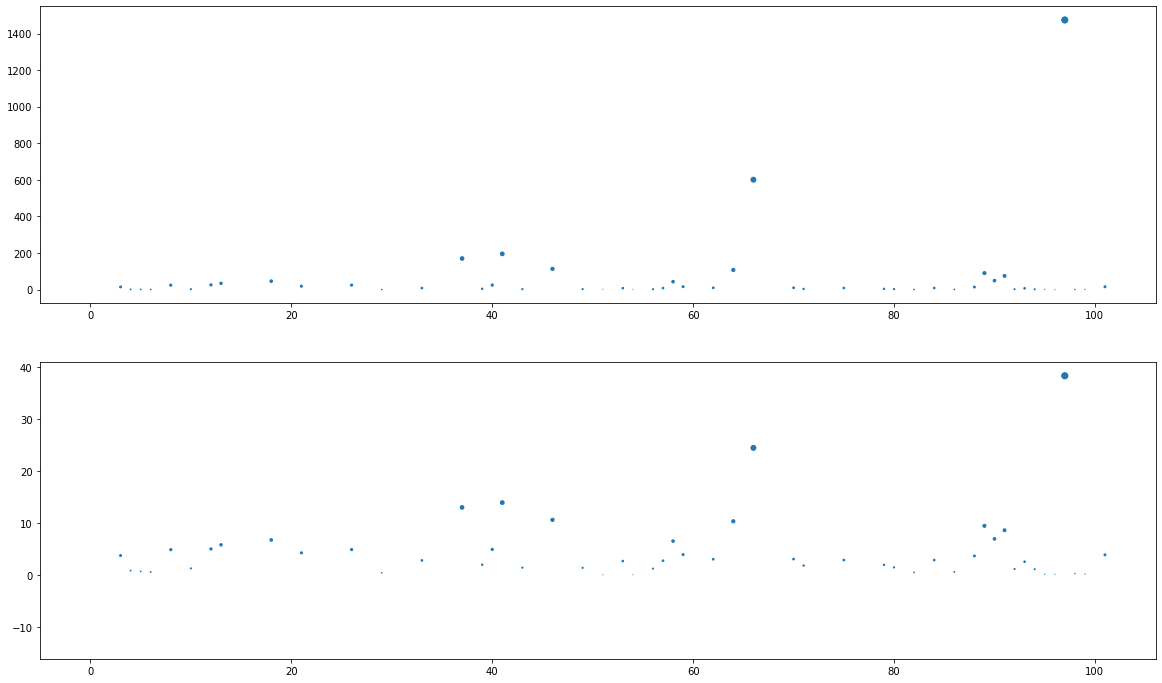

In [100]:
fig, ax = plt.subplots(2, 1, figsize=(20, 12))
ax[0].scatter(range(df_result.shape[0]), df_result.squared_error, s=df_result.error, label="Squared Error")
ax[1].scatter(range(df_result.shape[0]), df_result.error, s=df_result.error, label="Error");

In [103]:
df_rm = pd.DataFrame({'RM': X_test.RM, 'y_predicted': y_predicted})
df_rm.sort_values(by='RM', ascending=False, inplace=True)
df_rm

,RM,y_predicted
232,8.337,39.132992
226,8.040,36.755509
195,7.875,39.367349
203,7.853,39.870399
280,7.820,35.919858
...,...,...
209,5.344,15.091302
413,5.155,9.534614
310,4.973,11.076541
368,4.970,11.594716


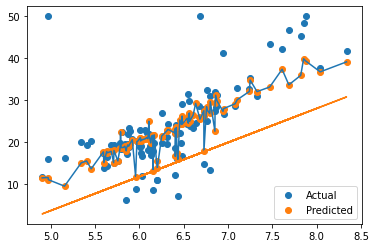

In [122]:
plt.scatter(X_test.RM, y_test, label='Actual')
plt.scatter(X_test.RM, y_predicted, label='Predicted')

df = pd.DataFrame({'RM': X_test.RM, 'predicted': y_predicted}).sort_values(by='RM', ascending=False)
plt.plot(df.RM, df.predicted)
plt.plot(X_test.RM, model.coef_[1] * X_test.RM + model.intercept_)
plt.legend(loc='best')
plt.show()

In [104]:
X_test

,ZN,RM,B
8,12.5,5.631,386.63
289,52.5,6.565,371.72
68,12.5,5.594,396.90
211,0.0,5.404,395.24
226,0.0,8.040,387.38
...,...,...,...
368,0.0,4.970,375.52
144,0.0,4.903,396.90
336,0.0,5.869,396.90
437,0.0,6.152,9.32


In [106]:
y_test

8      16.5
289    24.8
68     17.4
211    19.3
226    37.6
       ... 
368    50.0
144    11.8
336    19.5
437     8.7
216    23.3
Name: MEDV, Length: 102, dtype: float64

In [107]:
X_train

,ZN,RM,B
192,45.0,7.178,390.49
138,0.0,5.857,392.04
251,22.0,6.438,377.07
13,0.0,5.949,396.90
256,90.0,7.454,386.34
...,...,...,...
385,0.0,5.277,396.90
197,80.0,7.107,354.31
439,0.0,5.627,396.90
174,0.0,5.859,393.23


In [108]:
y_train


192    36.4
138    13.3
251    24.8
13     20.4
256    44.0
       ... 
385     7.2
197    30.3
439    12.8
174    22.6
122    20.5
Name: MEDV, Length: 404, dtype: float64